# Effect of Fincances on Academic Outcomes
#### Ian Russell
This short analysis will explore census beaureau data on educational funding between the years 1993 and 2016. Over the past two and a half decades the U.S. education system has seen many different federal administrations and financial harships. This notebook will begin to take a look at some spending habits of these institutions across all 50 states. Additionally, this analysis may prove useful for evaluating the effectivness of schools, in a general sense, in terms of test scores in mathematics and language arts.

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
states = pd.read_csv('data/states.csv')
scores = pd.read_csv('data/naep.csv')

It appears as if 1992 contains a significant amouth of missing in data in a couple of the columns. In this case I will simply drop the year altogher.

In [448]:
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,NET_FUNDS,PERCENTAGE_NET,PARTISAN,PER_CAPITA,CPI
0,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,-6042,100.0,Red,3885.294538,144.475
1,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,65000,95.0,Red,9833.586451,144.475
2,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,-195970,106.0,Red,5068.743466,144.475
3,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,-29158,102.0,Red,4324.889543,144.475
4,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,-67648,100.0,Blue,5466.763539,144.475


In [297]:
states = states.dropna()
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760


In [298]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

### Observing data characteristics

It would be wise to begin to get a feel for the data. The describe function in the next cell can shine a bit of light on some basic descriptors. Unfortunately there doesn't seem to be anything particularly exciting to see.

In [299]:
states.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1224.000000,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03
mean,2004.500000,9.175416e+05,9.290765e+06,7.873945e+05,4.312719e+06,4.190651e+06,9.395936e+06,4.864428e+06,2.737271e+06,4.299509e+05,9.242366e+05
std,6.925016,1.066514e+06,1.191733e+07,1.164312e+06,5.620372e+06,5.564716e+06,1.215400e+07,6.385360e+06,3.399931e+06,5.347893e+05,1.349417e+06
min,1993.000000,4.386600e+04,4.656500e+05,3.367200e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,1998.750000,2.645145e+05,2.224650e+06,1.931018e+05,1.191590e+06,7.380178e+05,2.211494e+06,1.195616e+06,6.527800e+05,1.034492e+05,1.886915e+05
50%,2004.500000,6.499335e+05,5.256748e+06,4.219105e+05,2.614030e+06,2.098524e+06,5.415694e+06,2.737071e+06,1.567025e+06,2.717040e+05,5.295925e+05
75%,2010.250000,1.010532e+06,1.110987e+07,8.479270e+05,5.224320e+06,4.793464e+06,1.089286e+07,5.648436e+06,3.308660e+06,5.172222e+05,9.908930e+05
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07


### Viewing Concentration of Funds by State
From here we now will want to start visualizing the many different data distributions in the set. I would like to determine if there are any glaring difference among states across all the features of the dataset.

In [300]:
states.drop(states[states['STATE'] == 'District of Columbia'].index, inplace=True)
mask = (scores['AVG_SCORE'].str.len() != 1)
scores = scores[mask]
scores['AVG_SCORE'] = scores['AVG_SCORE'].astype('float');

In [301]:
def multi_hist(df, statevar, features):
    stateNames = df[statevar].unique()
    columns = [feature for feature in df.columns[2:]]
    f, ax = plt.subplots(3,3, figsize=(12,9), sharey = False)
    
    for subplot_row, data in enumerate([columns[0:3], columns[3:6], columns[6:9]]):
        for feature_column, feature in enumerate(data):
            for state in stateNames:
                sns.distplot(df[feature][df[statevar]==state], ax = ax[subplot_row, feature_column])

            ax[subplot_row, feature_column].set_xscale('log')
            ax[subplot_row, feature_column].set_title(feature)
            ax[subplot_row, feature_column].set_xlabel('USD Log Scale')
            ax[subplot_row, 0].set_ylabel('Concentration of Funds')
            #ax[subplot_row, feature_column].legend_.remove()
            
    plt.tight_layout(pad=0)

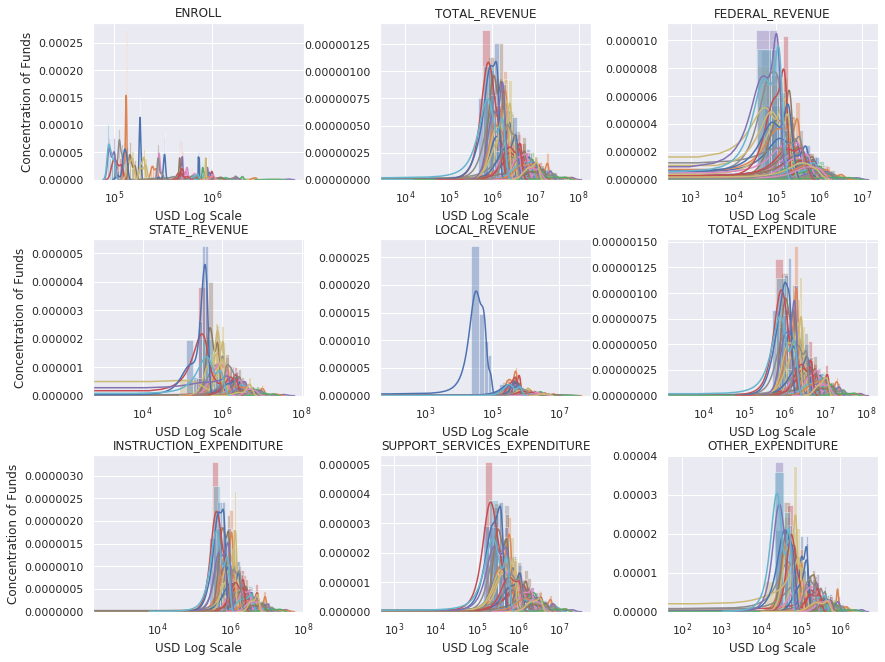

In [302]:
features = states.columns[2:len(states.columns)]
multi_hist(states, "STATE", features)

A very interesting occurence is appearing in the state of Hawaii amongst concentration of local revenue. Just for a sanity check, I will remove the log scale to see whats going on and compare to any other state.

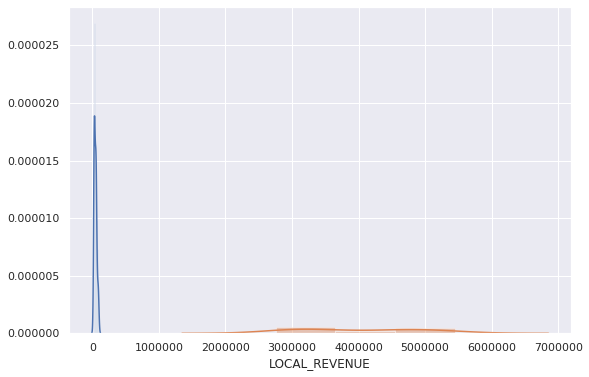

In [303]:
fig, (ax) = plt.subplots(figsize=(9,6))
# ax.set_xscale('log')
sns.distplot(states[states['STATE'] == 'Hawaii']['LOCAL_REVENUE'])
sns.distplot(states[states['STATE'] == 'Wisconsin']['LOCAL_REVENUE'])

Here it looks as if Hawaii recieves a lot of its local revenue in very small quanitites. Thus, the density spikes greatly. However, this is natural as revenue shouldn't be varying greatly within individual states and as the numbers get bigger the curve will flatten.

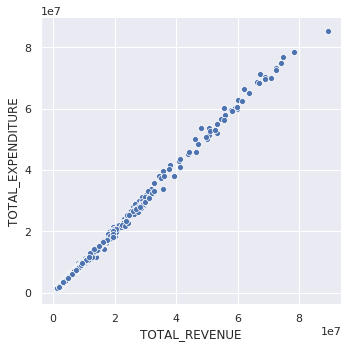

In [304]:
sns.relplot(x='TOTAL_REVENUE', y='TOTAL_EXPENDITURE', data = states)

Obviously, since this is public sector, expenditure and revinue correlate very strongly. However, the correlation is not perfect. Let's see if this is often a defecit or a surplus.

,YEAR,NET_FUNDS,PERCENTAGE_NET
0,1993,-19949.30,100.60
1,1994,-37603.96,100.72
2,1995,-50920.26,100.52
3,1996,-95266.84,101.70
4,1997,-80030.54,101.76
5,1998,-92884.38,100.84
6,1999,-116236.96,101.14
7,2000,-131956.10,101.04
8,2001,-172520.32,101.14
9,2002,-322579.02,102.08


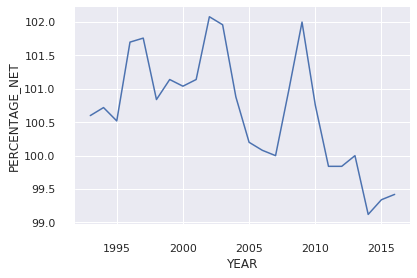

In [457]:
states["NET_FUNDS"] = states["TOTAL_REVENUE"]-states["TOTAL_EXPENDITURE"]
states["PERCENTAGE_NET"] = 100-round((states["NET_FUNDS"]/states["TOTAL_REVENUE"])*100)
g = states.groupby('YEAR').mean()[['NET_FUNDS', 'PERCENTAGE_NET']].reset_index()

sns.lineplot(x="YEAR", y="PERCENTAGE_NET",
            palette=["m", "g"],
            data=g)
sns.despine(offset=10, trim=True)
g

For most of the years there was a tendency to overspend. It wasn't until 2010 when that started to change. This is certainly intersting. Also, there is an expected large spike around 2008 implying that the recession likely caused a sudden resurgence of overspending.

## Partisan Analysis
### Condensing data into red and blue states

This may prove to be useful in determing overall attitude towards education and general spending habits of different states. I've chosen to include partisanship as I belive it reflects a deeper public attitude in each of the corresponding states. This may have an effect on total revenue as I would suspect that local and state revenue would be lesser in republican states. Although I concede that republican states also tend to have lower enrollment due to generally smaller populations.

In [306]:
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,NET_FUNDS,PERCENTAGE_NET
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,-6042,100.0
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,65000,95.0
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,-195970,106.0
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,-29158,102.0
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,-67648,100.0


In [307]:
states['PARTISAN'] = np.NaN
states = states.reset_index().drop(columns=['index'])

In [308]:
Dem = ['Washington', 'Oregon', 'California', 'Nevada', 'Colorado', 
       'New Mexico', 'Minnesota', 'Wisconsin', 'Illinois', 'Michigan', 
        'Pennsylvania', 'Virginia', 'Delaware', 'Maryland', 'New Jersey', 
       'New York', 'Vermont', 'New Hampshire', 'Massachusetts', 'Connecticut', 
       'Rhode Island', 'Maine', 'Hawaii']

Rep = ['Idaho', 'Utah', 'Arizona', 'Montana', 'Wyoming', 
       'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
       'Oklahoma', 'Louisiana', 'Missisipi', 'Tennessee', 'Kentucky', 
       'Alabama', 'Georgia', 'South Carolina', 'North Carolina', 'West Virginia']

Swing = ['Iowa', 'Ohio', 'Florida']

In [309]:
mask = (states['STATE'].isin(Dem))
states['PARTISAN'] = mask
states['PARTISAN'][states['PARTISAN'] == True] = 'Blue'
states['PARTISAN'][states['PARTISAN'] == False] = 'Red'

/home/ian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [310]:
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,NET_FUNDS,PERCENTAGE_NET,PARTISAN
0,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,-6042,100.0,Red
1,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,65000,95.0,Red
2,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,-195970,106.0,Red
3,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,-29158,102.0,Red
4,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,-67648,100.0,Blue


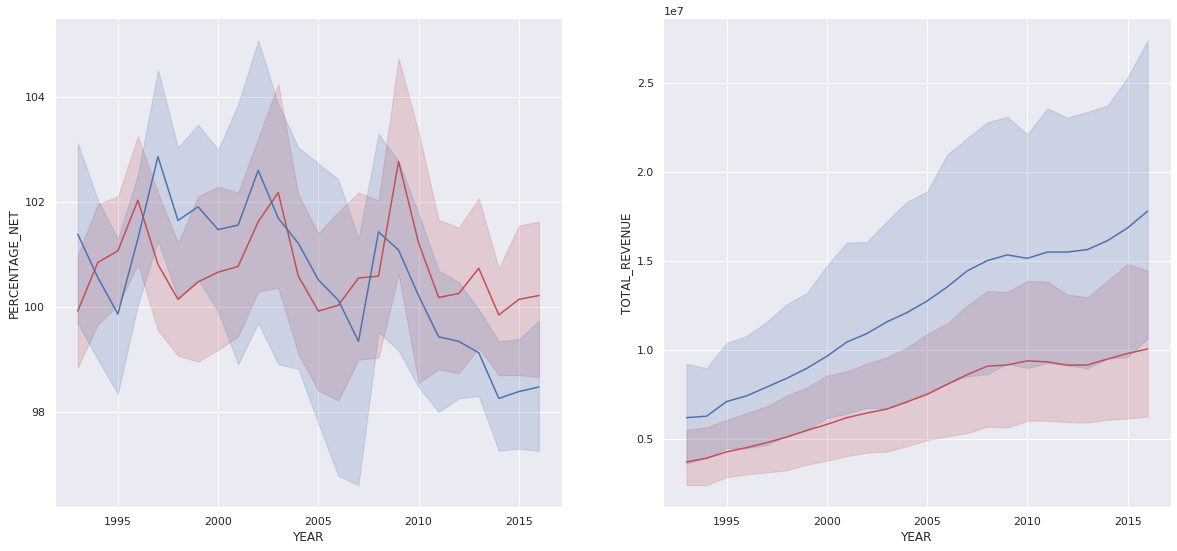

In [311]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,9))

sns.relplot(x="YEAR", y="PERCENTAGE_NET", hue="PARTISAN", 
            kind="line", data=states, ax = ax1, palette={"Red": "r", "Blue": "b"})

sns.relplot(x="YEAR", y="TOTAL_REVENUE", hue="PARTISAN",
            kind="line", data=states, ax=ax2, palette={"Red": "r", "Blue": "b"})
plt.close(2)
plt.close(3)


Spending tends to be much more variable among democrat states. Interestingly, it seems as if spedning efficency (funds leftover) tends to flip flop going from period to period. I would infer that this is due to goverment administrations such as the presidency based on the fact that the changes occur during election years. 

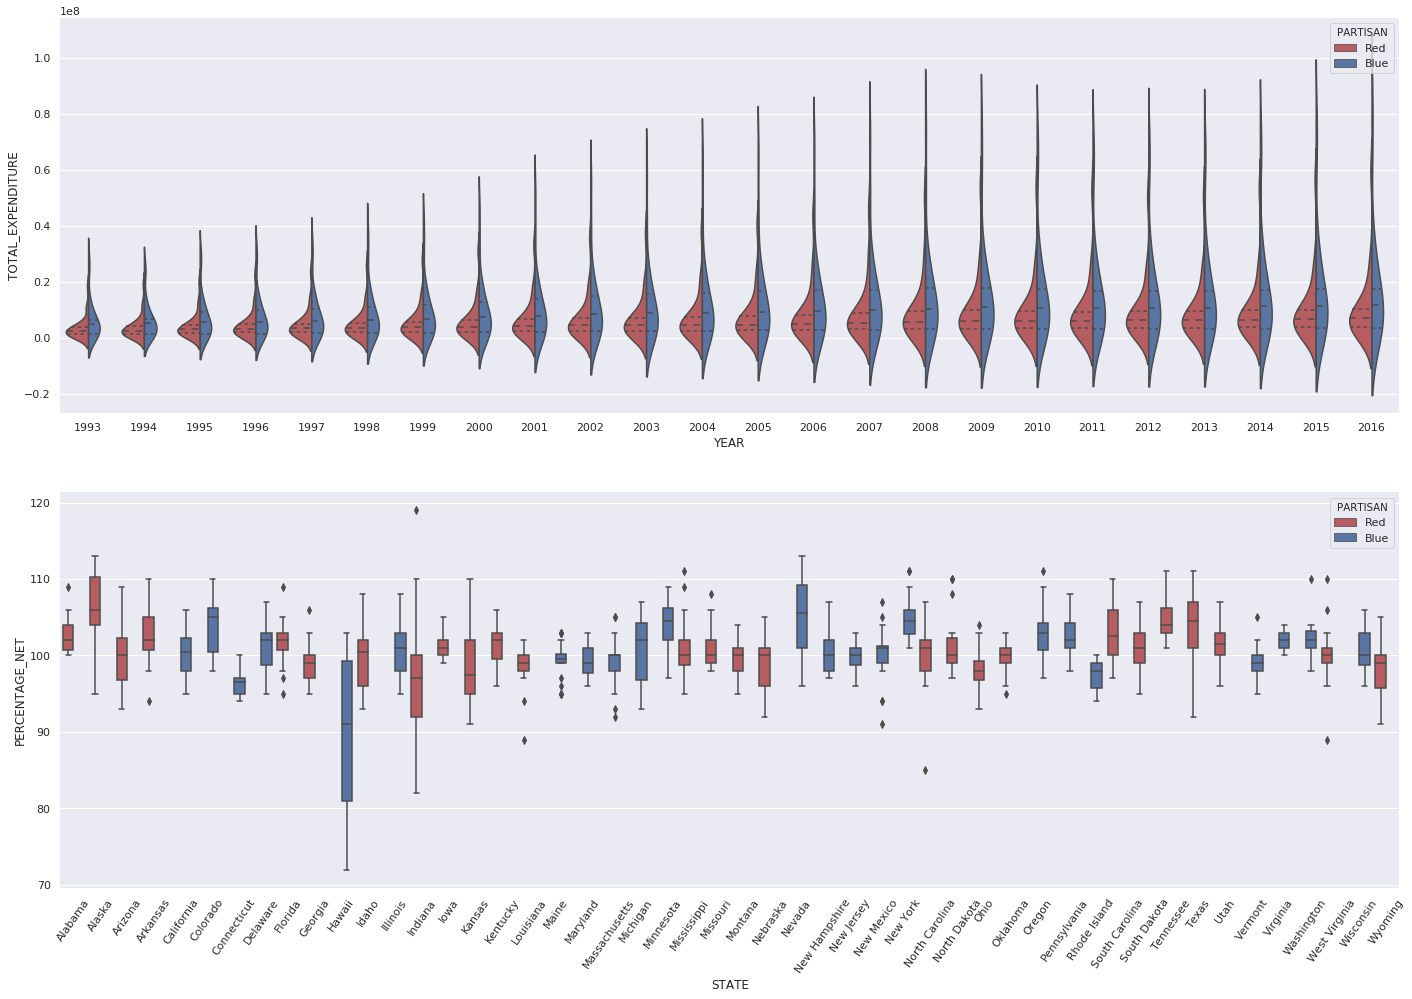

In [312]:
fig_dims = (24, 16)
fig, (ax1,ax2) = plt.subplots(2,1, figsize=fig_dims)
plt.xticks(rotation=55)
sns.violinplot(x="YEAR", y="TOTAL_EXPENDITURE", hue="PARTISAN",
               split=True, inner="quart", ax = ax1,
               palette={"Red": "r", "Blue": "b"},
               data=states)
sns.boxplot(x="STATE", y="PERCENTAGE_NET", hue="PARTISAN",
                 ax = ax2,
               palette={"Red": "r", "Blue": "b"},
               data=states)
sns.despine(left=True)

From this it may seem as if Reublican states tend to recieve funds with a much smaller standard deviation. In this sense it may be the case the Democrat states are more sensitive to the needs of more or less populace states. Contrary to this assumption may also be that population is simply more consistent among Republican states, thus requiring a higher concentration of similar funding. Interstingly, there is not much change to the distribution of expenditure amongst recession years. 

Deficits provide a much more intersting picture. The distribution of defecits tend to vary greatly across the years and across partisan differences. There may be some discernable patterns in spending habits between conservative and liberal states. Hawaii again is appearing as a significant outlier.

# Visualizing Spending: Choropleth

In [313]:
import plotly.express as px

In [314]:
statesAbrv = states.replace({"STATE": us_state_abbrev})
avgs = statesAbrv.groupby('STATE').mean().reset_index()


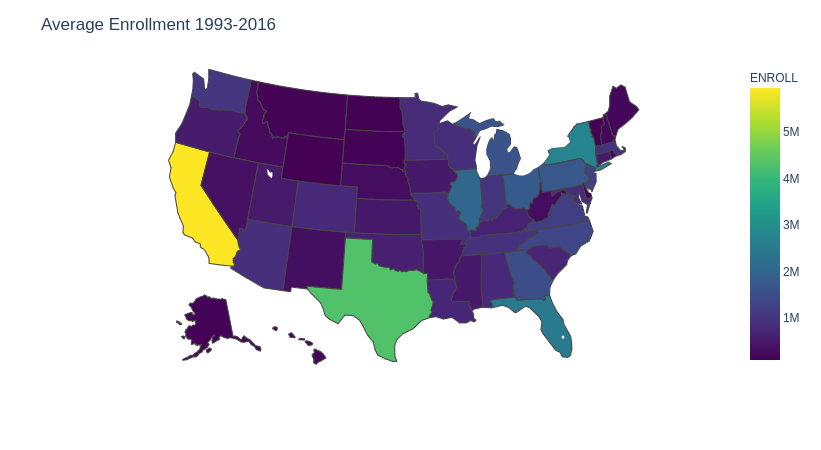

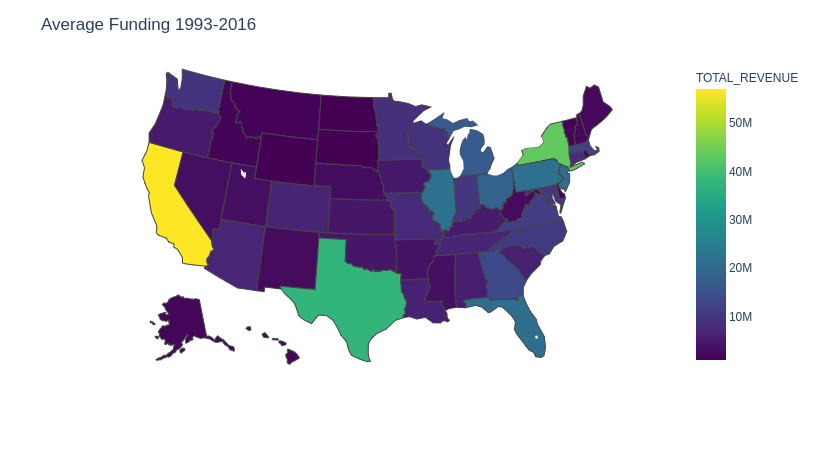

In [315]:
fig = px.choropleth(avgs,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color_continuous_scale='Viridis',
                    color="ENROLL",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Enrollment 1993-2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen
fig = px.choropleth(avgs,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color_continuous_scale='Viridis',
                    color="TOTAL_REVENUE",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Funding 1993-2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

### Good news! It looks as if spending and enrollment correlate accordingly, no real outliers.

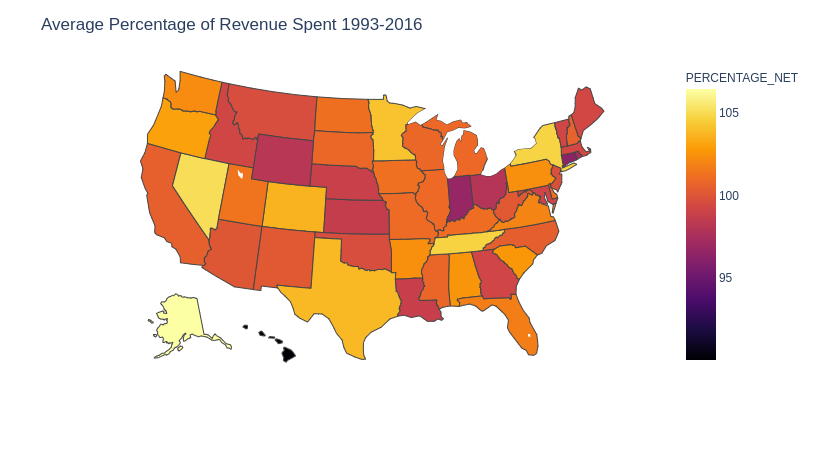

In [316]:
fig = px.choropleth(avgs,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color_continuous_scale='inferno',
                    color="PERCENTAGE_NET",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Percentage of Revenue Spent 1993-2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen


## Expenditure Per Capita

In [317]:
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,NET_FUNDS,PERCENTAGE_NET,PARTISAN
0,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,-6042,100.0,Red
1,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,65000,95.0,Red
2,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,-195970,106.0,Red
3,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,-29158,102.0,Red
4,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,-67648,100.0,Blue


In [318]:
statesAbrv['PER_CAPITA'] = states['TOTAL_REVENUE']*1000/ states['ENROLL']
states['PER_CAPITA'] = states['TOTAL_REVENUE']*1000/ states['ENROLL']

In [319]:
statesAbrv = statesAbrv.groupby('STATE').mean().reset_index()

In [320]:
statesAbrv.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,NET_FUNDS,PERCENTAGE_NET,PER_CAPITA
0,AK,2004.5,1.304296e+05,1.747975e+06,2.576199e+05,1.084260e+06,4.060946e+05,1.852882e+06,9.086642e+05,6.416755e+05,5.982192e+04,2.077469e+05,-104907.166667,106.458333,13372.191756
1,AL,2004.5,7.365843e+05,5.665312e+06,6.162310e+05,3.251907e+06,1.797174e+06,5.816799e+06,2.997855e+06,1.712755e+06,4.613081e+05,5.321015e+05,-151486.916667,102.583333,7678.062326
2,AR,2004.5,4.519019e+05,3.690548e+06,4.169468e+05,2.672163e+06,6.014378e+05,3.789589e+06,1.926156e+06,1.148143e+06,2.537191e+05,3.486896e+05,-99041.125000,102.416667,8013.337043
3,AZ,2004.5,8.743221e+05,6.715749e+06,8.068774e+05,2.829688e+06,3.079183e+06,6.680881e+06,3.090671e+06,2.117506e+06,3.344099e+05,8.533645e+05,34867.750000,100.083333,7528.984939
4,CA,2004.5,5.945343e+06,5.703000e+07,5.943424e+06,3.157023e+07,1.951634e+07,5.746073e+07,2.844648e+07,1.655871e+07,2.907487e+06,6.329844e+06,-430728.916667,100.541667,9427.504914


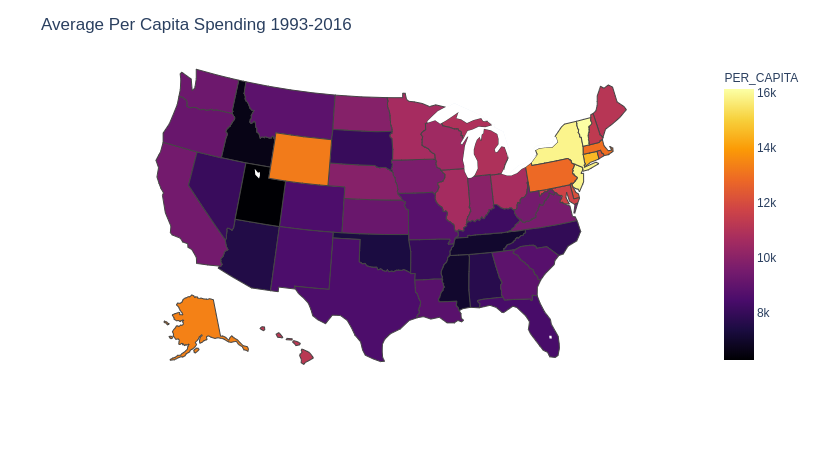

In [321]:

fig = px.choropleth(statesAbrv,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color_continuous_scale='inferno',
                    color="PER_CAPITA",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Per Capita Spending 1993-2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen


## Consideration of U.S. Inflation Rates

In [322]:
df = pd.read_csv('data/inflation.csv')

In [323]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [324]:
df['DATE'] = pd.DatetimeIndex(df['DATE']).year

In [325]:
df = df[df['DATE'] > 1992]
df = df[df['DATE'] < 2017]

In [326]:
df.reset_index().drop(columns=['index']);

In [327]:
df.groupby('DATE').mean().reset_index(inplace=True)
inflation.columns=['YEAR', 'CPI']
states = pd.merge(states, inflation, on='YEAR');

In [328]:
adjusted = pd.DataFrame(columns = ['STATE', 'YEAR','DEFLATED_PER_STUDENT'])

In [329]:
adjusted['DEFLATED_PER_STUDENT'] = states['PER_CAPITA']/(states['CPI']/100)
adjusted['YEAR'] = states['YEAR']
adjusted['STATE'] = states['STATE']

Now that the nominal values have been adjusted we can compare trends to see what is really going on. It this is not neccesarily a constant increase as inflation was occuring rapidly during this period.

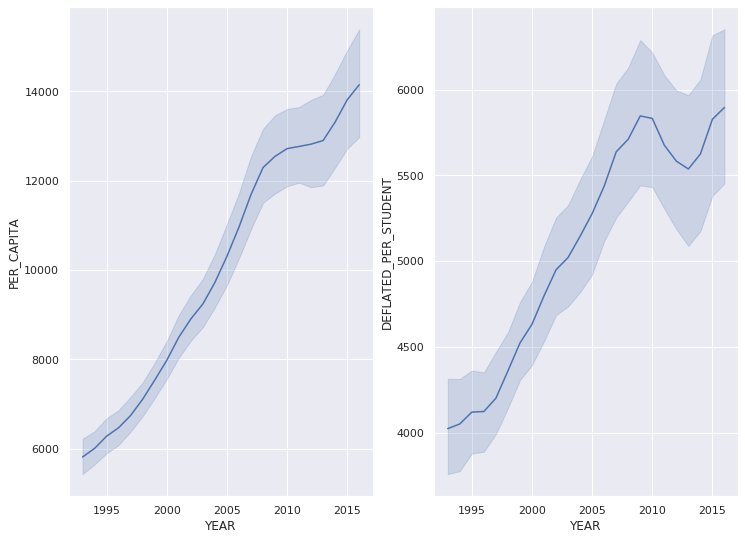

In [330]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,9))

sns.set(style="darkgrid")
sns.lineplot(x="YEAR", y="PER_CAPITA",
             data=states, ax = ax1)
sns.lineplot(x="YEAR", y="DEFLATED_PER_STUDENT",
             data=adjusted, ax = ax2)


In [331]:
adjusted.head()

,STATE,YEAR,DEFLATED_PER_STUDENT
0,Alabama,1993,2689.250416
1,Alaska,1993,6806.427721
2,Arizona,1993,3508.387933
3,Arkansas,1993,2993.521054
4,California,1993,3783.882013


In [332]:
scores = scores[scores['YEAR'] < 2017]
scores = scores[scores['YEAR'] > 1992]

In [345]:
average_scores = scores.groupby('YEAR').mean().reset_index()

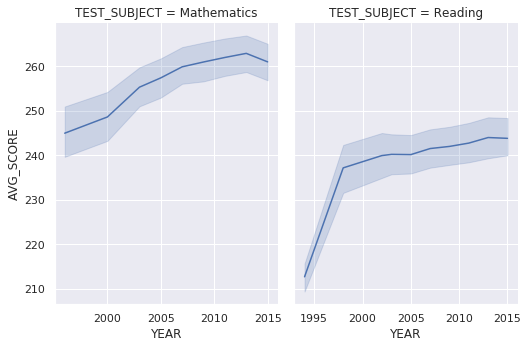

In [346]:
palette = dict(zip(scores.TEST_SUBJECT.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="YEAR", y="AVG_SCORE",
            col="TEST_SUBJECT",
            palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=scores)

In [432]:
ss = pd.merge(scores, adjusted).drop(columns = 'TEST_YEAR')

In [458]:
math = ss[ss["TEST_SUBJECT"] == 'Mathematics']
read = ss[ss["TEST_SUBJECT"] == 'Reading']


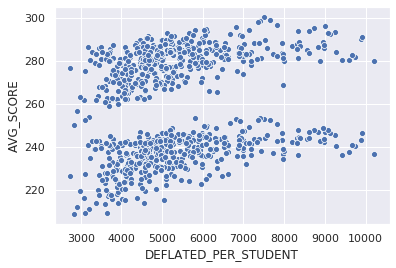

In [443]:
sns.scatterplot(x='DEFLATED_PER_STUDENT', y='AVG_SCORE', data=math)
sns.lineplot(x=)

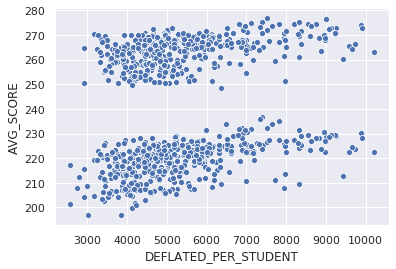

In [446]:
sns.scatterplot(x='DEFLATED_PER_STUDENT', y='AVG_SCORE', data=read)

These are some quite obvious clusters. The most interesting part is that scores seem to be relatively unaffected by more spending per capita, even when adjusted for inflation. There is certainly a lot more to the picture than just direct spending on each student.

## Future Analysis

This starter notebook on these data leaves a lot to be desired. There is alot to explore but the test score clusters are extremely interesting. In the future I would want to take a look at the more high resolution data including individual districts to try to determine what exactly is going on here. Furthermore, I would like to adapt the concept of the student growth percentile to the state level in order to see how it fairs as a metric on a much more macro scale.